In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from google.colab import files
uploaded = files.upload()

Saving test_final.csv to test_final (1).csv
Saving train_final.csv to train_final (1).csv


In [ ]:
train = pd.read_csv("train_final (1).csv")
test = pd.read_csv("test_final (1).csv")

In [ ]:
train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,3,2016,February,7,12,0,2,2,...,E,F,0,No Deposit,0,Transient,81.0,1,0,2016-02-14
1,City Hotel,1,50,2016,November,47,18,1,2,2,...,A,A,0,No Deposit,0,Transient,93.6,0,2,2016-10-09
2,City Hotel,0,14,2015,September,37,7,1,5,2,...,F,F,0,No Deposit,0,Contract,166.0,0,3,2015-09-13
3,City Hotel,0,18,2015,December,50,6,2,0,2,...,A,A,0,No Deposit,0,Transient,107.0,0,0,2015-12-08
4,City Hotel,1,263,2016,September,40,29,2,4,2,...,A,A,0,No Deposit,0,Transient,100.3,0,0,2016-01-18


In [ ]:
test.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,City Hotel,73,2016,July,28,6,0,2,1,0.0,...,A,A,0,No Deposit,0,Transient,107.10,0,0,2016-06-12
1,City Hotel,37,2015,October,43,24,2,5,1,1.0,...,A,A,0,No Deposit,0,Transient,87.78,0,0,2015-10-31
2,City Hotel,190,2017,April,14,6,2,3,2,0.0,...,A,A,0,No Deposit,0,Transient,88.40,0,0,2016-09-29
3,City Hotel,287,2016,August,35,24,1,4,2,0.0,...,B,B,1,No Deposit,0,Transient,76.71,0,0,2016-08-29
4,Resort Hotel,386,2016,October,43,20,1,3,2,0.0,...,A,A,0,No Deposit,0,Transient-Party,49.00,0,0,2016-09-14


In [ ]:
print("Number of missing values in train dataset:")
print(train.isna().sum())
print("Number of missing values in test dataset:")
print(test.isna().sum())

Number of missing values in train dataset:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44638 entries, 0 to 44637
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           44638 non-null  object 
 1   is_canceled                     44638 non-null  int64  
 2   lead_time                       44638 non-null  int64  
 3   arrival_date_year               44638 non-null  int64  
 4   arrival_date_month              44638 non-null  object 
 5   arrival_date_week_number        44638 non-null  int64  
 6   arrival_date_day_of_month       44638 non-null  int64  
 7   stays_in_weekend_nights         44638 non-null  int64  
 8   stays_in_week_nights            44638 non-null  int64  
 9   adults                          44638 non-null  int64  
 10  children                        44638 non-null  float64
 11  babies                          44638 non-null  int64  
 12  meal                            

In [ ]:
train['is_canceled'].value_counts()

0    31354
1    13284
Name: is_canceled, dtype: int64

<ipython-input-117-80a7b506f16a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=y_data, palette='hls')


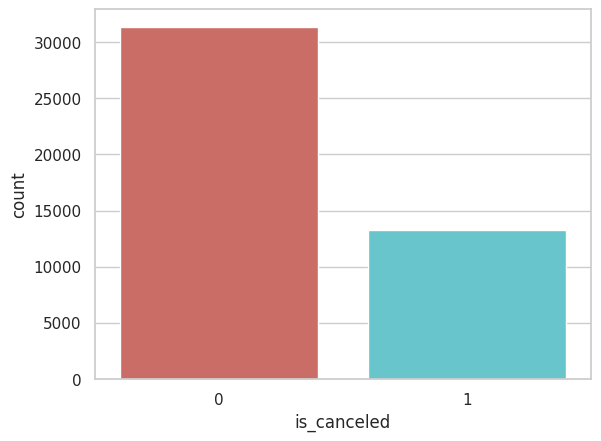

In [ ]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
y_data = pd.DataFrame(train['is_canceled'])
sns.countplot(x='is_canceled', data=y_data, palette='hls')
plt.show()

In [ ]:
train.loc[:, train.dtypes == object]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,February,BB,PRT,Direct,Direct,E,F,No Deposit,Transient,2016-02-14
1,City Hotel,November,BB,BEL,Online TA,TA/TO,A,A,No Deposit,Transient,2016-10-09
2,City Hotel,September,BB,ITA,Online TA,TA/TO,F,F,No Deposit,Contract,2015-09-13
3,City Hotel,December,BB,ESP,Online TA,TA/TO,A,A,No Deposit,Transient,2015-12-08
4,City Hotel,September,BB,DEU,Online TA,TA/TO,A,A,No Deposit,Transient,2016-01-18
...,...,...,...,...,...,...,...,...,...,...,...
44633,City Hotel,June,BB,JPN,Online TA,TA/TO,D,D,No Deposit,Transient,2017-06-28
44634,Resort Hotel,September,BB,GBR,Online TA,TA/TO,E,F,No Deposit,Transient,2015-10-03
44635,City Hotel,April,SC,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,2017-02-09
44636,City Hotel,September,HB,NOR,Offline TA/TO,TA/TO,A,A,No Deposit,Transient-Party,2016-09-12


In [ ]:
train['hotel'].value_counts()

City Hotel      29335
Resort Hotel    15303
Name: hotel, dtype: int64

In [ ]:
train['market_segment'].value_counts()

Online TA        21325
Offline TA/TO     9085
Groups            6868
Direct            4922
Corporate         2046
Complementary      308
Aviation            84
Name: market_segment, dtype: int64

In [ ]:
train['deposit_type'].value_counts()

No Deposit    40235
Non Refund     4339
Refundable       64
Name: deposit_type, dtype: int64

In [ ]:
train['arrival_date_month'].value_counts()

August       5232
July         4712
May          4336
October      4207
April        4118
June         4100
September    3826
March        3678
February     3106
November     2577
December     2483
January      2263
Name: arrival_date_month, dtype: int64

In [ ]:
train['meal'].value_counts()

BB           34424
HB            5479
SC            4038
Undefined      445
FB             252
Name: meal, dtype: int64

In [ ]:
train['country'].value_counts()

PRT    16999
GBR     4914
FRA     4207
ESP     3382
DEU     2957
       ...  
MRT        1
DMA        1
LCA        1
ETH        1
CAF        1
Name: country, Length: 156, dtype: int64

In [ ]:
train['distribution_channel'].value_counts()

TA/TO        36298
Direct        5722
Corporate     2535
GDS             83
Name: distribution_channel, dtype: int64

In [ ]:
train['reserved_room_type'].value_counts()

A    31897
D     7356
E     2488
F     1082
G      784
B      433
C      355
H      241
P        2
Name: reserved_room_type, dtype: int64

In [ ]:
train['assigned_room_type'].value_counts()

A    27069
D     9838
E     3022
F     1395
G      972
C      909
B      847
H      285
I      170
K      129
P        2
Name: assigned_room_type, dtype: int64

In [ ]:
train['customer_type'].value_counts()

Transient          32982
Transient-Party     9826
Contract            1594
Group                236
Name: customer_type, dtype: int64

In [ ]:
train['reservation_status_date'].value_counts()

2015-10-21    448
2016-11-25    260
2015-07-06    238
2015-01-01    234
2016-01-18    175
             ... 
2015-03-09      1
2015-03-11      1
2015-04-07      1
2015-05-05      1
2015-02-02      1
Name: reservation_status_date, Length: 890, dtype: int64

In [ ]:
train = train.drop('reservation_status_date', axis=1)
#train[['reservation_status_date', 'date1']] = train['reservation_status_date']. str.split('-', expand= True )
#df[['V','allele']] = df['V'].str.split('-',expand=True)

In [ ]:
train = train.drop('country', axis=1)

In [ ]:
train.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,3,2016,February,7,12,0,2,2,...,0,E,F,0,No Deposit,0,Transient,81.00,1,0
1,City Hotel,1,50,2016,November,47,18,1,2,2,...,0,A,A,0,No Deposit,0,Transient,93.60,0,2
2,City Hotel,0,14,2015,September,37,7,1,5,2,...,0,F,F,0,No Deposit,0,Contract,166.00,0,3
3,City Hotel,0,18,2015,December,50,6,2,0,2,...,0,A,A,0,No Deposit,0,Transient,107.00,0,0
4,City Hotel,1,263,2016,September,40,29,2,4,2,...,0,A,A,0,No Deposit,0,Transient,100.30,0,0
5,Resort Hotel,0,45,2016,March,10,1,0,5,2,...,0,E,G,1,No Deposit,0,Transient,106.00,0,1
6,Resort Hotel,0,131,2015,December,52,22,2,5,2,...,0,D,D,1,No Deposit,0,Transient-Party,72.14,0,1
7,Resort Hotel,0,152,2017,July,28,11,2,5,2,...,0,D,D,0,No Deposit,0,Transient-Party,194.86,0,2
8,City Hotel,0,102,2015,October,42,16,0,2,2,...,0,A,E,0,No Deposit,0,Transient-Party,109.00,0,0
9,Resort Hotel,0,4,2017,April,17,26,0,2,1,...,1,A,A,0,No Deposit,0,Transient,45.00,0,0


In [ ]:
train = pd.get_dummies(train, columns=['hotel', 'market_segment', 'deposit_type', 'arrival_date_month', 'meal', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type'])

train.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_P,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,3,2016,7,12,0,2,2,0.0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,50,2016,47,18,1,2,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,14,2015,37,7,1,5,2,2.0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,18,2015,50,6,2,0,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,263,2016,40,29,2,4,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
train.dtypes

is_canceled                      int64
lead_time                        int64
arrival_date_year                int64
arrival_date_week_number         int64
arrival_date_day_of_month        int64
                                 ...  
assigned_room_type_P             uint8
customer_type_Contract           uint8
customer_type_Group              uint8
customer_type_Transient          uint8
customer_type_Transient-Party    uint8
Length: 75, dtype: object

In [ ]:
train = train.drop('assigned_room_type_P', axis=1)

In [ ]:
train = train.drop('reserved_room_type_P', axis=1)

In [ ]:
train.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,3,2016,7,12,0,2,2,0.0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,50,2016,47,18,1,2,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,14,2015,37,7,1,5,2,2.0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,18,2015,50,6,2,0,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,263,2016,40,29,2,4,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
test.loc[:, test.dtypes == object]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_date
0,City Hotel,July,SC,CN,Online TA,TA/TO,A,A,No Deposit,Transient,2016-06-12
1,City Hotel,October,SC,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,2015-10-31
2,City Hotel,April,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,2016-09-29
3,City Hotel,August,BB,DEU,Direct,Direct,B,B,No Deposit,Transient,2016-08-29
4,Resort Hotel,October,BB,PRT,Groups,Corporate,A,A,No Deposit,Transient-Party,2016-09-14
...,...,...,...,...,...,...,...,...,...,...,...
23520,City Hotel,May,BB,DEU,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,2016-05-29
23521,City Hotel,November,BB,PRT,Corporate,Corporate,A,A,No Deposit,Transient,2016-11-04
23522,City Hotel,May,BB,PRT,Corporate,Corporate,A,A,No Deposit,Transient,2016-05-18
23523,Resort Hotel,March,BB,PRT,Groups,TA/TO,A,A,No Deposit,Transient-Party,2017-01-11


In [ ]:
test['hotel'].value_counts()

City Hotel      16770
Resort Hotel     6755
Name: hotel, dtype: int64

In [ ]:
test['market_segment'].value_counts()

Online TA        11019
Groups            5295
Offline TA/TO     4612
Direct            1742
Corporate          713
Complementary      104
Aviation            40
Name: market_segment, dtype: int64

In [ ]:
test['deposit_type'].value_counts()

No Deposit    17982
Non Refund     5520
Refundable       23
Name: deposit_type, dtype: int64

In [ ]:
test['arrival_date_month'].value_counts()

August       2719
July         2519
May          2408
April        2324
June         2275
September    2173
October      2165
March        1784
February     1564
December     1318
November     1239
January      1037
Name: arrival_date_month, dtype: int64

In [ ]:
test['meal'].value_counts()

BB           18304
HB            2729
SC            2091
FB             216
Undefined      185
Name: meal, dtype: int64

In [ ]:
test['country'].value_counts()

PRT    12391
GBR     1763
FRA     1486
ESP     1369
DEU      972
       ...  
TZA        1
PAN        1
COM        1
CMR        1
MCO        1
Name: country, Length: 121, dtype: int64

In [ ]:
test['distribution_channel'].value_counts()

TA/TO        20400
Direct        2086
Corporate     1015
GDS             24
Name: distribution_channel, dtype: int64

In [ ]:
test['reserved_room_type'].value_counts()

A    17435
D     3497
E     1121
F      539
G      423
B      206
C      174
H      129
L        1
Name: reserved_room_type, dtype: int64

In [ ]:
test['assigned_room_type'].value_counts()

A    16182
D     4098
E     1251
F      636
G      460
C      356
B      343
H      140
I       34
K       24
L        1
Name: assigned_room_type, dtype: int64

In [ ]:
test['customer_type'].value_counts()

Transient          18621
Transient-Party     4096
Contract             733
Group                 75
Name: customer_type, dtype: int64

In [ ]:
test['reservation_status_date'].value_counts()

2015-10-21    529
2015-07-06    303
2016-11-25    280
2015-01-01    276
2016-01-18    227
             ... 
2015-04-25      1
2015-04-18      1
2015-04-08      1
2017-09-10      1
2015-05-25      1
Name: reservation_status_date, Length: 890, dtype: int64

In [ ]:
test = test.drop('reservation_status_date', axis=1)

In [ ]:
test = test.drop('country', axis=1)

In [ ]:
test = pd.get_dummies(test, columns=['hotel', 'market_segment', 'deposit_type', 'arrival_date_month', 'meal', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type'])

test.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,73,2016,28,6,0,2,1,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,37,2015,43,24,2,5,1,1.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,190,2017,14,6,2,3,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,287,2016,35,24,1,4,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,386,2016,43,20,1,3,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
test.dtypes

lead_time                        int64
arrival_date_year                int64
arrival_date_week_number         int64
arrival_date_day_of_month        int64
stays_in_weekend_nights          int64
                                 ...  
assigned_room_type_L             uint8
customer_type_Contract           uint8
customer_type_Group              uint8
customer_type_Transient          uint8
customer_type_Transient-Party    uint8
Length: 75, dtype: object

In [ ]:
test = test.drop('assigned_room_type_L', axis=1)

In [ ]:
test = test.drop('reservation_status_date', axis=1)

In [ ]:
test = test.drop('reserved_room_type_L', axis=1)

In [ ]:
test.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,73,2016,28,6,0,2,1,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,37,2015,43,24,2,5,1,1.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,190,2017,14,6,2,3,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,287,2016,35,24,1,4,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,386,2016,43,20,1,3,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = train.drop(columns=['is_canceled'])
y = train['is_canceled']

In [ ]:
print(f'X shape: {X.shape}')
print(f'Y shape: {y.shape}')

X shape: (44638, 72)
Y shape: (44638,)


In [ ]:
model = LogisticRegression()


In [ ]:
model.fit(X, y)

answers_pred = model.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# answers_pred - ответы которые вернула модель для X_test
# y_test - это правильные ответы для X_test
print(f'Accuracy: {accuracy_score(y, answers_pred)}')
print(f'Precision: {precision_score(y, answers_pred)}')
print(f'Recall: {recall_score(y, answers_pred)}')

Accuracy: 0.8096464895380617
Precision: 0.7545464213548867
Recall: 0.5341011743450768


In [ ]:
test.shape

(23525, 72)

In [ ]:
y_pred_test = model.predict(test)

In [ ]:
y_pred_test


array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
y_pred_test = pd.DataFrame(y_pred_test, columns=['is_canceled'])
y_pred_test = y_pred_test.reset_index()

y_pred_test.to_csv("solution.csv", index=False)

files.download("solution.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>